## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

In [50]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = pd.read_csv('my_data/iris_data.csv')
new_iris = iris[['Sepal length', 'Sepal width','Species']]
new_iris.head()

,Sepal length,Sepal width,Species
0,"5,10","3,50",I. setosa
1,"4,90","3,00",I. setosa
2,"4,70","3,20",I. setosa
3,"4,60","3,10",I. setosa
4,"5,00","3,60",I. setosa


In [52]:
labels_unique = np.unique(new_iris['Species'])
print(labels_unique)

['I. setosa' 'I. versicolor' 'I. virginica']


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(new_iris)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    n_clustrs = len(labels_unique)
    
        colors = cycle('bgrcmy')
    for k, col in zip(range(n_clusters), colors):
        my_members = (labels == k)
        cluster_center = cluster_centers[k]
    




## Clustering Class Exercise
# part 1

### 1. Create a synthetic dataset with sklearn.datasets.make_classification
  - `X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)`
  - X represents the 2 features in a list
  - y represents the classification label for each feature set

In [71]:
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift, estimate_bandwidth

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
     n_redundant=0, n_clusters_per_class=1, random_state=4)

X


array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

### 2. Based on the labels scatter plot each of the 1000 entries in one of 2 different colors

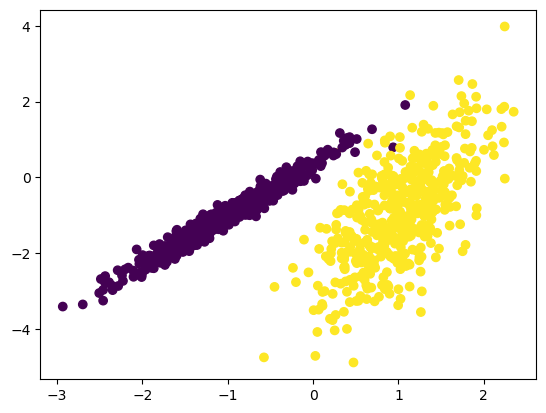

In [73]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y)

## 3. Now without knowing the labels (we do know them ofcourse) we will try different algorithms on the data
- import AffinityPropagation from sklearn.cluster
- Create a model: model = AffinityPropagation(damping=0.7)
- Fit the model with the data from the features (X): model.fit(X)
- And assign cluster to each sample: p=model.predict(X)
- Find the unique clusters with np.unique() method
- Scatterplot each sample, colored by its cluster
- Compare with the scatterplot of the actual classifications

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


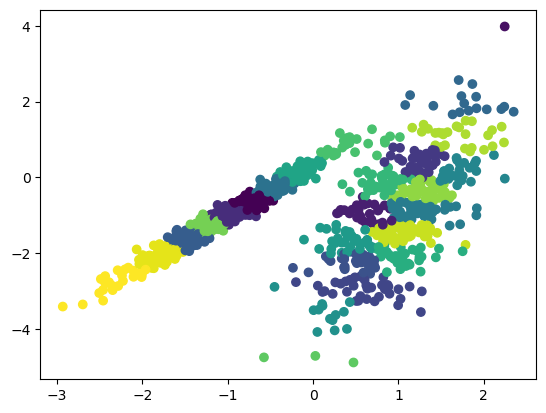

In [99]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.7)
model.fit(X)
p=model.predict(X)
unique_clusters = np.unique(p)#?

print(unique_clusters)

plt.scatter(X[:,0],X[:,1], c=p)

## 4. Try with cluster algorithm: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
    - Use the documentation to create DBSCAN clusters for the feature samples
    - Scatter plot the result

In [32]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(unique_clusters)
print(clustering)


DBSCAN(eps=DBSCAN(eps=3, min_samples=2))
